# Projeto 1 - Ciência dos Dados

## Nome: Gabriela Moreno Boriero


## Pergunta (s) a ser respondida

1- Desde que o Uruguai entrou no Mercosul houve aumento na porcentagem das exportações em relação ao PIB? 
2- Qual a relação das exportações do Uruguay com: os outros países do bloco; o resto do mundo e países similares a Uruguai?


## Explicação da hipótese e mecanismo

O Mercosul é um bloco economico formado por Uruguai, Argentina, Brasil e Paraguai. Este tem como objetivo integrar os países tanto economicamente quanto aos habitantes.Assim, por meio da tarifa externa comum (TEC) os países do bloco possuem mais competetitividade, dessa forma possibilitando um aumento no numero de exportações. 
https://www.significados.com.br/mercosul/

## Bases de dados usadas

https://www.gapminder.org/data/

Variaveis:
* Exports(/% of GDP)
* GDP


## Análise de dados

Insira abaixo uma análise de dados tratada para ter maior clareza. 

Lembre-se de que, além deste arquivo principal, você precisa entregar um ou mais *notebooks* mais brutos com todas as tentativas que fez e que não deram certo .

**Não inclua dados ou gráficos sem motivação nem interpretação** - sempre que fizer uma análise, plot ou tablea, diga qual sua intenção. Logo após a apresentação diga qual conclusão específica ou interpretação você tira daquela análise

In [1]:
#import
%matplotlib inline
import pandas as pd
import seaborn as sns
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#leitura dos arquivos em Excel
exportacao = pd.read_excel('exports_percent_of_gdp.xlsx')
pib = pd.read_excel('gdp_total_yearly_growth.xlsx')

In [3]:
#mudando o índice das tabelas
exportacao_indice = exportacao.set_index("country")
pib_indice = exportacao.set_index("country")


In [5]:
#tabela do Uruguai
#será usada para dividir entre ANTES e DEPOIS de entrar no MERCOSUL 
exportacao_Uruguay = exportacao_indice.loc['Uruguay',:]


As tabelas de ANTES e DEPOIS da entrada no Mercosul será utilizada para formar 2 retas e por meio da regressão descobrir qual a diferença de inclinação entre as retas:


In [6]:
#tabela do Uruguai ANTES de entrar no mercosul 
antes=exportacao_Uruguay.transpose()
uruguay_anterior=antes[(antes.index>1960) & (antes.index<1990)]
uruguay_anterior

1961    142.0
1962    113.0
1963    120.0
1964    119.0
1965    184.0
1966    171.0
1967    146.0
1968    152.0
1969    134.0
1970    139.0
1971    103.0
1972    154.0
1973    104.0
1974    144.0
1975    168.0
1976    196.0
1977    199.0
1978    188.0
1979    168.0
1980    150.0
1981    152.0
1982    143.0
1983    257.0
1984    266.0
1985    268.0
1986    262.0
1987    216.0
1988    221.0
1989    235.0
Name: Uruguay, dtype: float64

Text(0, 0.5, 'Exportação Uruguay ')

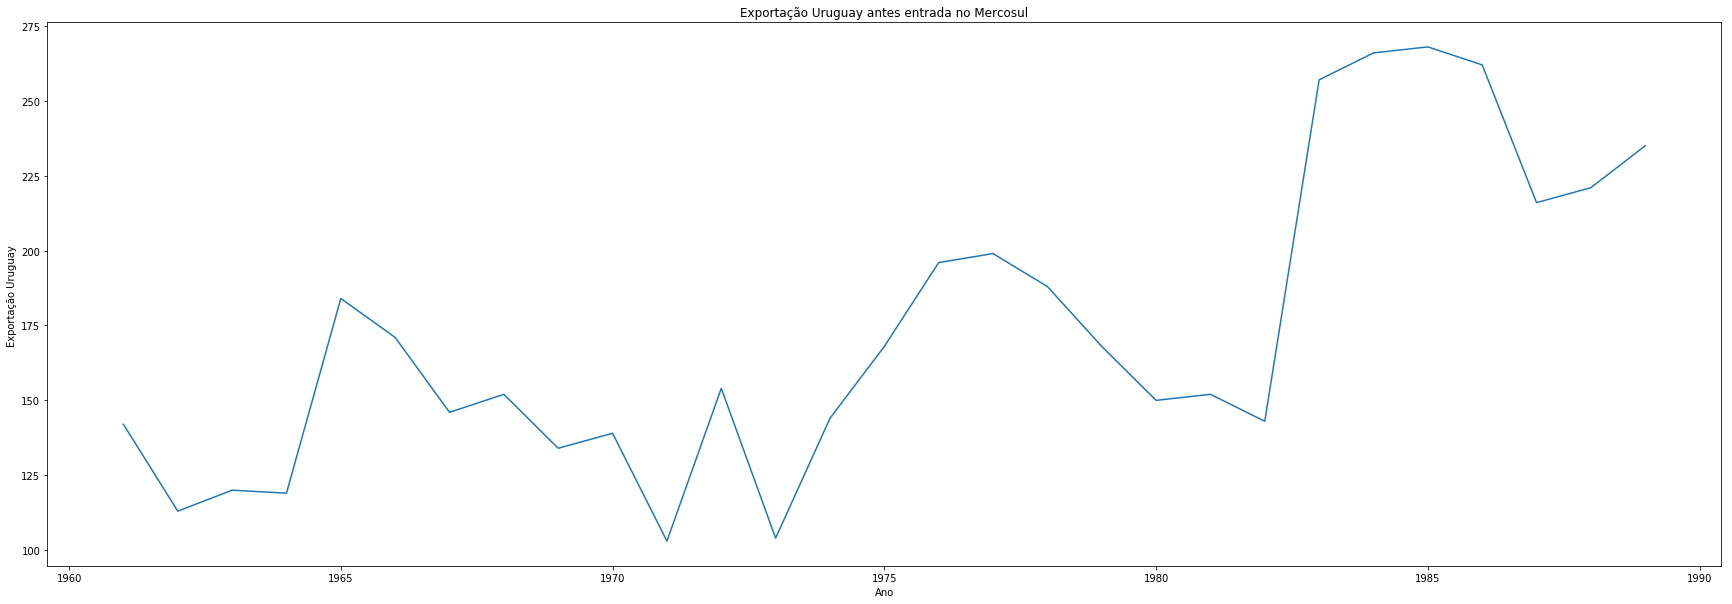

In [7]:
plt.figure(figsize=(30,10))
plt.plot(uruguay_anterior.index,uruguay_anterior)
plt.title('Exportação Uruguay antes entrada no Mercosul')
plt.xlabel('Ano')
plt.ylabel('Exportação Uruguay ')

In [8]:
média_uruguay_antes=uruguay_anterior.mean()
média_uruguay_antes

172.89655172413794

In [9]:
#tabela do Uruguai DEPOIS de entrar no mercosul 
depois=exportacao_Uruguay.transpose()
uruguay_depois=depois[(depois.index>1990)]
uruguay_depois

1991    207.0
1992    204.0
1993    191.0
1994    198.0
1995    190.0
1996    197.0
1997    175.0
1998    164.0
1999    151.0
2000    167.0
2001    168.0
2002    206.0
2003    274.0
2004    321.0
2005    304.0
2006    303.0
2007    291.0
2008    302.0
2009    271.0
2010    263.0
2011    264.0
2012    259.0
2013    234.0
2014    235.0
2015    225.0
2016    214.0
2017    216.0
Name: Uruguay, dtype: float64

Text(0, 0.5, 'Exportação Uruguay ')

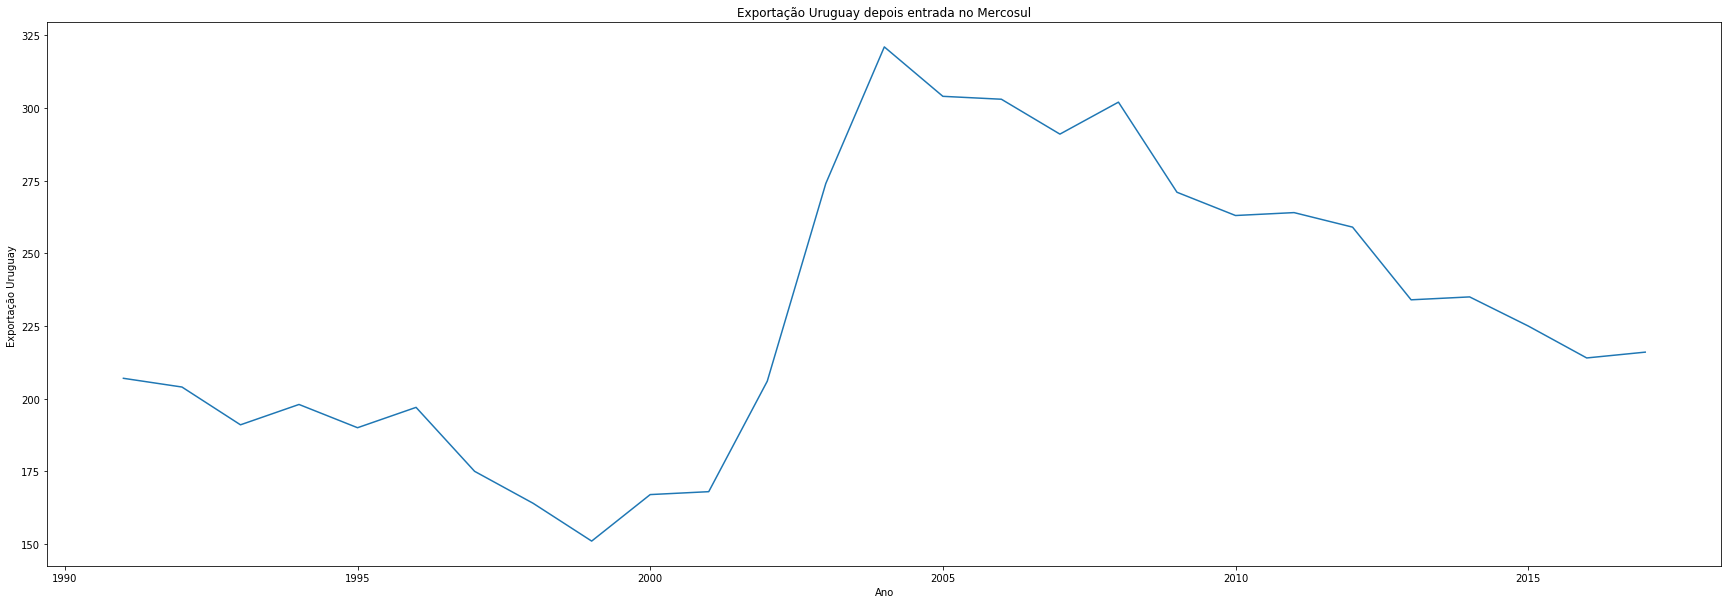

In [10]:
plt.figure(figsize=(30,10))
plt.plot(uruguay_depois.index,uruguay_depois)
plt.title('Exportação Uruguay depois entrada no Mercosul')
plt.xlabel('Ano')
plt.ylabel('Exportação Uruguay ')

In [11]:
média_uruguay_depois=uruguay_depois.mean()
média_uruguay_depois

229.40740740740742

In [12]:
data = {
'Época': ['Antes', 'Depois'],
'Média': [média_uruguay_antes,média_uruguay_depois],
}
tabela_media_uruguay = pd.DataFrame(data, columns=['Época', 'Média'])


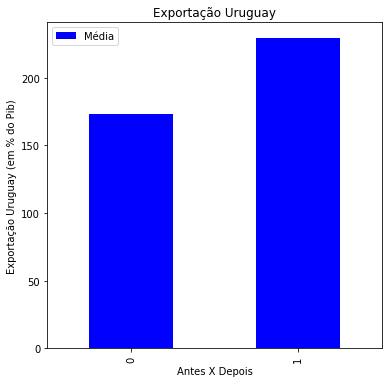

In [13]:
plot = tabela_media_uruguay.plot(kind='bar',title='Exportação Uruguay',figsize=(6, 6),color=('b','g'))
plt.ylabel('Exportação Uruguay (em % do Pib)')
plt.xlabel('Antes X Depois')
plt.show()

Text(0, 0.5, 'Exportação Uruguay ')

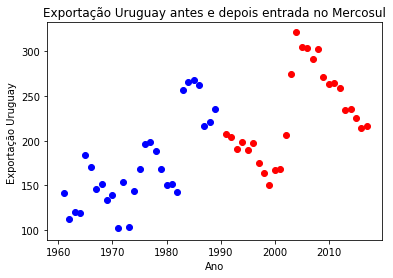

In [14]:
plt.scatter(uruguay_depois.index,uruguay_depois, color="r")
plt.scatter(uruguay_anterior.index, uruguay_anterior, color="b")
plt.title('Exportação Uruguay antes e depois entrada no Mercosul')
plt.xlabel('Ano')
plt.ylabel('Exportação Uruguay ')

In [15]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Retas Uruguay antes e depois da entrada no Mercosul')
    plt.xlabel('Anos')
    plt.ylabel('exportação(% do Pib)')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()


In [16]:
#arrumando o index
uai = uruguay_anterior.reset_index()
udi= uruguay_depois.reset_index()
udi

,index,Uruguay
0,1991,207.0
1,1992,204.0
2,1993,191.0
3,1994,198.0
4,1995,190.0
5,1996,197.0
6,1997,175.0
7,1998,164.0
8,1999,151.0
9,2000,167.0


Ajuste linear entre:
Coeficiente linear: -8308.90147783251
Coeficiente angular: 4.294581280788177
Ajuste linear entre:
Coeficiente linear: -5671.259259259258
Coeficiente angular: 2.944444444444444


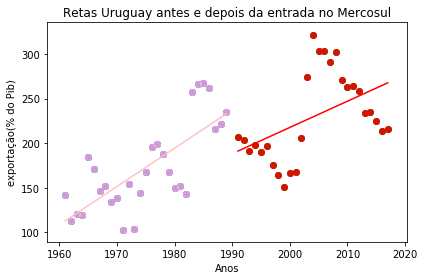

In [17]:
plt.scatter(uai["index"], uai.Uruguay, color="b")
reta(uai["index"], uai.Uruguay, "pink")
plt.scatter(udi["index"], udi.Uruguay, color="g")
reta(udi["index"], udi.Uruguay, "r")

# Separar os valores do mercosul para realizar um grafico com dois indices e plotar 3 linhas (mercosul, outros países e paises semelhantes aos do mercosul) 


In [48]:
#tabela do Mercosul
paises_no_mercosul=exportacao_indice.transpose()
MERCOSUL_1990 = paises_no_mercosul[(paises_no_mercosul.index>1990)]
exportacao_paises_Mercosul = MERCOSUL_1990.loc[:,["Uruguay","Argentina","Brazil","Paraguay"]]
exportacao_paises_Mercosul

country,Uruguay,Argentina,Brazil,Paraguay
1991,207.0,7.68,8.68,50.8
1992,204.0,6.60,10.90,49.8
1993,191.0,6.91,10.50,59.9
1994,198.0,7.53,9.67,60.8
1995,190.0,9.68,7.53,61.8
1996,197.0,10.40,6.73,52.7
1997,175.0,10.60,6.98,48.5
1998,164.0,10.40,7.03,56.3
1999,151.0,9.83,9.56,45.3
2000,167.0,11.00,10.20,46.8


In [51]:
#fazendo a média dos paises do mercosul a cada ano 
exportacao_paises_Mercosul_transposta=exportacao_paises_Mercosul.transpose()
média_paises_mercosul_ano=exportacao_paises_Mercosul_transposta.describe()

In [20]:
#calculando média de exportaçao dos paises pertencentes ao bloco desde a criação do bloco (1991)
média_paises_mercosul= média_paises_mercosul_ano.loc["mean",:]
média_total_países_mercosul=média_paises_mercosul.mean()
média_total_países_mercosul

76.92601851851852

In [50]:
exportacao_paises_Mercosul['Média'] = média_paises_mercosul
exportacao_paises_Mercosul

country,Uruguay,Argentina,Brazil,Paraguay,Média
1991,207.0,7.68,8.68,50.8,68.5400
1992,204.0,6.60,10.90,49.8,67.8250
1993,191.0,6.91,10.50,59.9,67.0775
1994,198.0,7.53,9.67,60.8,69.0000
1995,190.0,9.68,7.53,61.8,67.2525
1996,197.0,10.40,6.73,52.7,66.7075
1997,175.0,10.60,6.98,48.5,60.2700
1998,164.0,10.40,7.03,56.3,59.4325
1999,151.0,9.83,9.56,45.3,53.9225
2000,167.0,11.00,10.20,46.8,58.7500


Text(0, 0.5, 'Média exportação dos países do Mercosul')

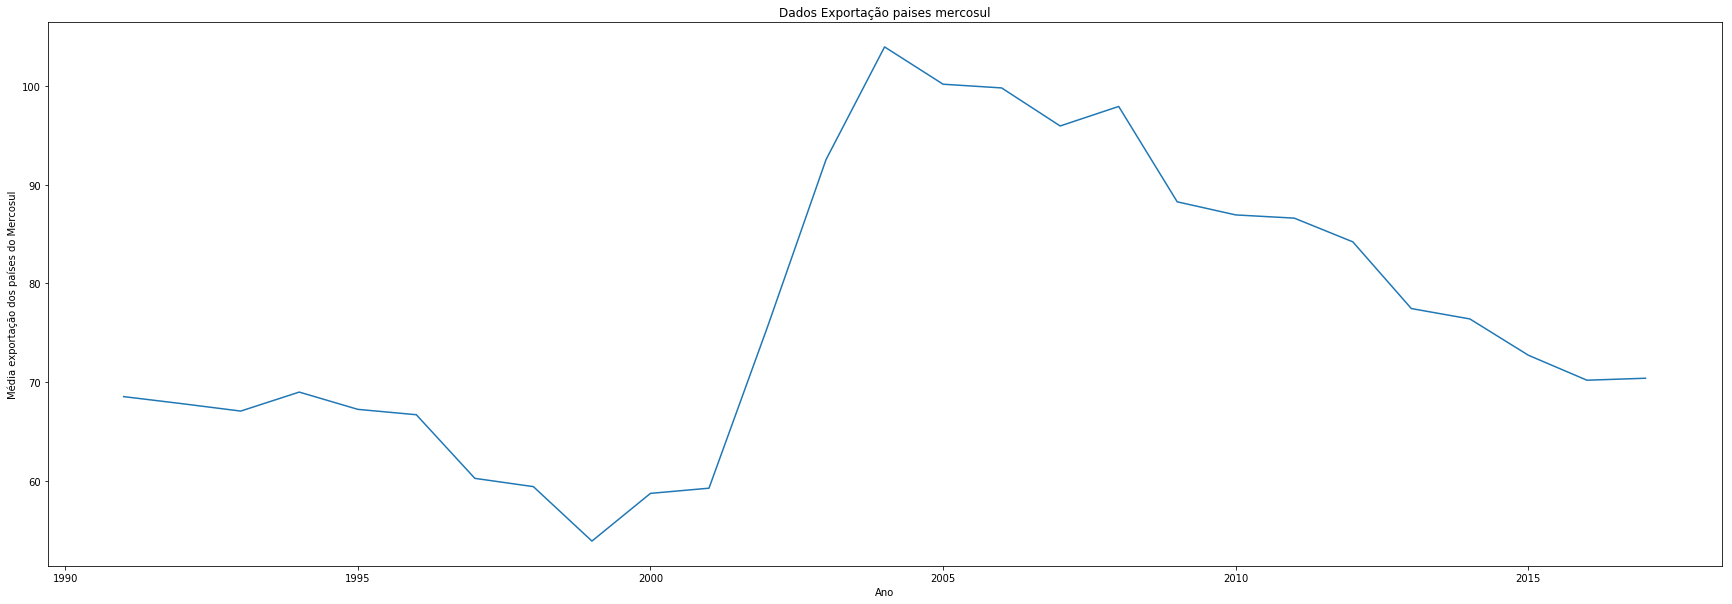

In [54]:
plt.figure(figsize=(30,10))
plt.plot(exportacao_paises_Mercosul.index ,exportacao_paises_Mercosul.Média)
plt.title('Dados Exportação paises mercosul')
plt.xlabel('Ano')
plt.ylabel('Média exportação dos países do Mercosul')

In [22]:
data = {
'País/Organização': ['Uruguay', 'Mercosul'],
'Média': [média_uruguay_depois,média_total_países_mercosul],
}
tabela_media_uruguayXmercosul = pd.DataFrame(data, columns=['País/Organização', 'Média'])
tabela_media_uruguayXmercosul

,País/Organização,Média
0,Uruguay,229.407407
1,Mercosul,76.926019


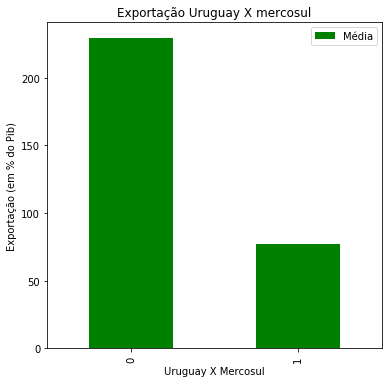

In [23]:
plot = tabela_media_uruguayXmercosul.plot(kind='bar',title='Exportação Uruguay X mercosul',figsize=(6, 6),color=('g','g'))
plt.ylabel('Exportação (em % do Pib)')
plt.xlabel('Uruguay X Mercosul')
plt.show()

Text(0, 0.5, 'Exportação')

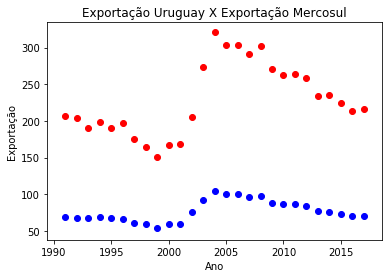

In [24]:
plt.scatter(uruguay_depois.index,uruguay_depois, color="r")
plt.scatter(exportacao_paises_Mercosul.index ,média_paises_mercosul, color="b")
plt.title('Exportação Uruguay X Exportação Mercosul')
plt.xlabel('Ano')
plt.ylabel('Exportação')

In [25]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Retas Uruguay antes e depois da entrada no Mercosul')
    plt.xlabel('Anos')
    plt.ylabel('exportação(% do Pib)')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()


In [26]:
#arrumando o index
eom = média_paises_mercosul.reset_index()

,index,mean
0,1991,68.5400
1,1992,67.8250
2,1993,67.0775
3,1994,69.0000
4,1995,67.2525
5,1996,66.7075
6,1997,60.2700
7,1998,59.4325
8,1999,53.9225
9,2000,58.7500


Ajuste linear entre:
Coeficiente linear: -5671.259259259258
Coeficiente angular: 2.944444444444444
Ajuste linear entre:
Coeficiente linear: -1469.4419851444848
Coeficiente angular: 0.7716407203907202


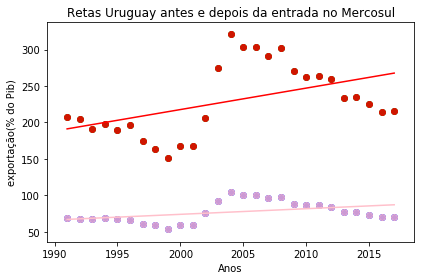

In [27]:
plt.scatter(udi["index"], udi.Uruguay, color="g")
reta(udi["index"], udi.Uruguay, "r")
plt.scatter(eom["index"] ,eom ["mean"] , color="b")
reta(eom["index"] ,eom ["mean"],"pink")


# Outros Países

In [28]:
exportacao_invertida=exportacao_indice.transpose()
exportacao_invertida

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1960,4.13,NaN,39.0,NaN,NaN,7.60,NaN,13.0,23.2,NaN,...,202.0,497.0,138.0,NaN,NaN,271.0,NaN,NaN,NaN,NaN
1961,4.45,NaN,46.2,NaN,NaN,5.99,NaN,12.4,23.0,NaN,...,199.0,490.0,142.0,NaN,NaN,287.0,NaN,NaN,NaN,NaN
1962,4.88,NaN,19.8,NaN,NaN,4.69,NaN,13.9,23.4,NaN,...,194.0,481.0,113.0,NaN,NaN,292.0,NaN,NaN,NaN,NaN
1963,9.17,NaN,24.7,NaN,NaN,7.89,NaN,13.0,23.4,NaN,...,193.0,487.0,120.0,NaN,NaN,289.0,NaN,NaN,NaN,NaN
1964,8.89,NaN,25.1,NaN,NaN,5.56,NaN,14.9,23.4,NaN,...,187.0,510.0,119.0,NaN,NaN,268.0,NaN,NaN,NaN,NaN
1965,11.30,NaN,22.6,NaN,NaN,6.23,NaN,13.2,23.8,NaN,...,185.0,499.0,184.0,NaN,NaN,258.0,NaN,NaN,NaN,NaN
1966,8.57,NaN,26.0,NaN,NaN,6.65,NaN,12.9,23.7,NaN,...,188.0,502.0,171.0,NaN,NaN,243.0,NaN,NaN,NaN,NaN
1967,6.77,NaN,23.4,NaN,NaN,7.50,NaN,12.9,23.7,NaN,...,185.0,505.0,146.0,NaN,NaN,243.0,NaN,NaN,NaN,NaN
1968,8.90,NaN,23.1,NaN,NaN,6.48,NaN,12.3,24.3,NaN,...,207.0,508.0,152.0,NaN,NaN,224.0,NaN,NaN,NaN,NaN
1969,10.10,NaN,23.8,NaN,NaN,6.40,NaN,12.0,26.8,NaN,...,215.0,509.0,134.0,NaN,NaN,213.0,NaN,NaN,NaN,NaN


In [29]:
#tabela dos outros países 
exportacao_outros_paises=exportacao_invertida.drop(columns=["Uruguay","Argentina","Brazil","Paraguay"])
tabela_outros_paises=exportacao_outros_paises.transpose()
tabela_outros_paises_depois_91=tabela_outros_paises.drop(columns =[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990])
tabela_outros_paises_depois_91

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.00,14.7,10.00,6.11,5.52,6.31,6.57,7.00,6.90,NaN
Albania,7.22,11.50,15.40,11.4,12.5,11.20,9.75,10.8,15.80,17.90,...,25.30,25.2,28.00,29.20,28.90,28.90,28.20,27.30,28.90,31.5
Algeria,29.10,25.30,21.80,22.5,26.2,29.80,30.90,22.6,28.20,42.10,...,48.00,35.4,38.40,38.80,36.90,33.20,30.20,23.20,21.00,24.0
Angola,28.60,47.40,49.30,NaN,NaN,NaN,NaN,NaN,NaN,89.70,...,76.30,54.9,62.30,65.40,63.10,55.70,48.00,33.40,30.00,29.9
Antigua and Barbuda,76.80,81.60,82.10,74.0,69.6,63.50,65.10,64.0,61.70,56.20,...,45.70,45.9,45.50,47.10,44.90,45.70,46.10,44.10,41.70,NaN
Armenia,40.70,39.80,47.20,39.3,23.9,23.20,20.30,19.0,20.80,23.40,...,15.00,15.5,20.80,23.80,27.60,28.40,28.60,29.70,33.10,38.1
Australia,16.10,16.70,17.60,18.0,17.9,18.90,19.20,19.6,18.40,19.40,...,20.20,23.0,19.80,21.50,21.50,20.00,21.10,20.00,19.30,21.3
Austria,34.60,33.20,31.50,32.2,33.5,34.20,37.00,38.4,39.40,43.30,...,53.20,45.2,51.30,53.90,54.00,53.40,53.40,52.90,52.30,53.9
Azerbaijan,45.70,86.20,57.40,24.7,27.9,29.50,29.00,22.7,28.00,39.00,...,65.80,51.6,54.30,56.40,53.00,48.30,43.30,37.80,46.40,48.7


In [30]:
medias_outros_paises_p_ano =tabela_outros_paises_depois_91.describe()
medias_outros_paises_p_ano 

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,151.000000,153.000000,154.000000,158.000000,164.000000,164.000000,165.000000,165.000000,165.000000,170.000000,...,174.000000,174.000000,174.000000,176.000000,176.000000,177.000000,177.000000,174.000000,171.000000,137.000000
mean,97.711457,108.707464,102.276335,108.056428,103.163204,104.502739,104.200485,106.701758,104.942667,114.237229,...,117.632799,104.837546,112.741374,123.217384,123.875398,115.044689,121.374237,107.412816,110.943567,104.550073
std,151.386073,179.464154,160.739997,171.212773,151.237470,156.662227,151.569700,159.546443,153.470870,177.028806,...,172.628785,158.310469,169.050781,186.521647,191.303780,175.354005,195.746652,172.037967,182.197471,173.610530
min,1.290000,0.582000,0.075600,0.035600,0.005380,0.009160,7.800000,5.590000,6.260000,0.539000,...,0.117000,0.103000,0.109000,0.099500,5.520000,6.310000,6.570000,6.250000,6.240000,7.740000
25%,20.500000,20.000000,20.325000,21.475000,22.575000,22.525000,22.900000,22.500000,23.300000,25.625000,...,27.800000,25.000000,26.825000,28.225000,29.125000,29.000000,28.600000,27.825000,27.700000,28.400000
50%,33.500000,35.700000,36.300000,36.550000,36.300000,36.100000,37.800000,37.200000,39.300000,42.250000,...,45.550000,39.300000,41.150000,44.900000,44.400000,42.400000,42.900000,40.500000,40.500000,39.900000
75%,76.850000,81.600000,76.075000,76.775000,70.550000,72.175000,77.000000,77.900000,78.900000,87.350000,...,81.875000,72.950000,80.750000,86.850000,85.850000,84.300000,82.600000,78.575000,74.500000,72.800000
max,964.000000,968.000000,952.000000,986.000000,840.000000,766.000000,872.000000,964.000000,778.000000,988.000000,...,800.000000,797.000000,777.000000,898.000000,931.000000,938.000000,991.000000,930.000000,983.000000,969.000000


In [31]:
média_outros_paises=medias_outros_paises_p_ano.loc["mean",:]
média_total_outros_paises=média_outros_paises.mean()
média_total_outros_paises

111.5846946678057

Text(0, 0.5, 'Média exportação dos países do Mundo')

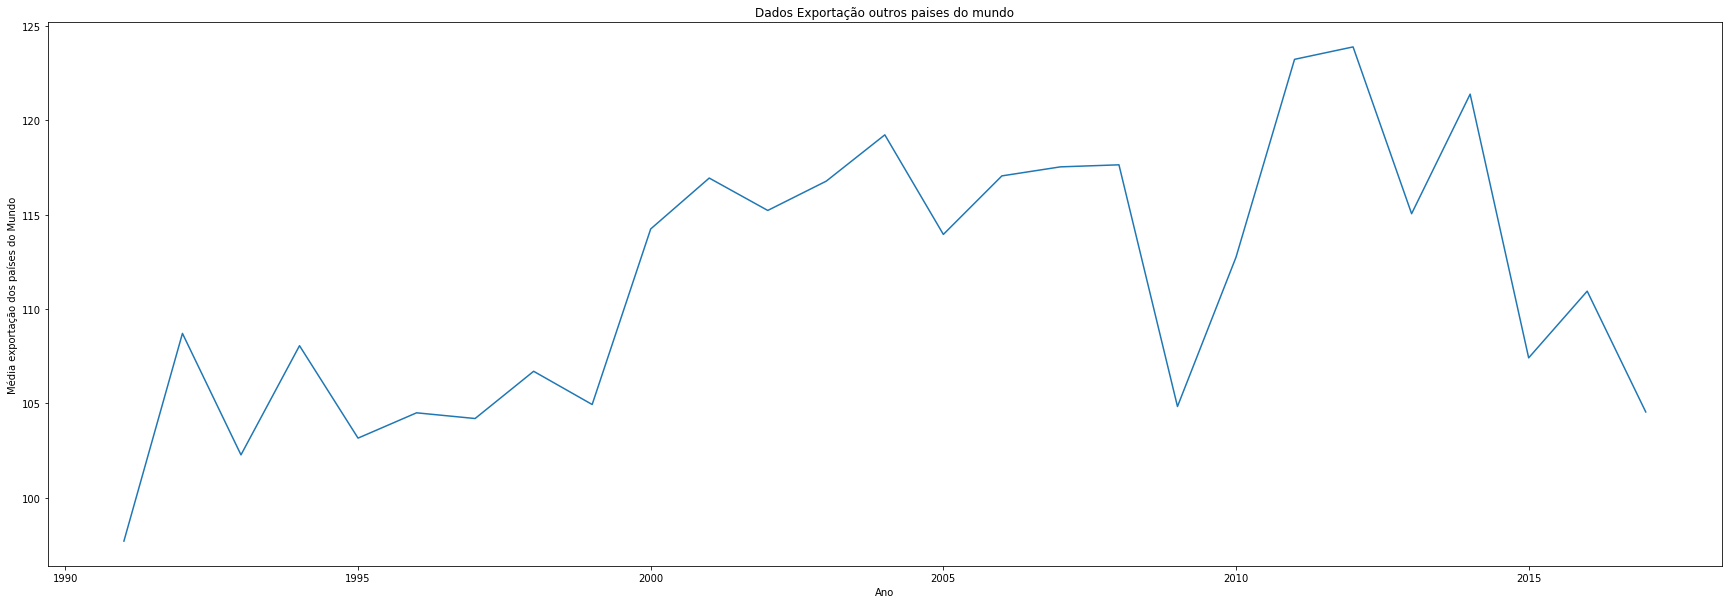

In [32]:
plt.figure(figsize=(30,10))
plt.plot(uruguay_depois.index ,média_outros_paises)
plt.title('Dados Exportação outros paises do mundo')
plt.xlabel('Ano')
plt.ylabel('Média exportação dos países do Mundo')

In [33]:
data = {
'País/Organização': ['Uruguay', 'Outros paises'],
'Média': [média_uruguay_depois,média_total_outros_paises],
}
tabela_media_uruguayXoutro_paises = pd.DataFrame(data, columns=['País/Organização', 'Média'])

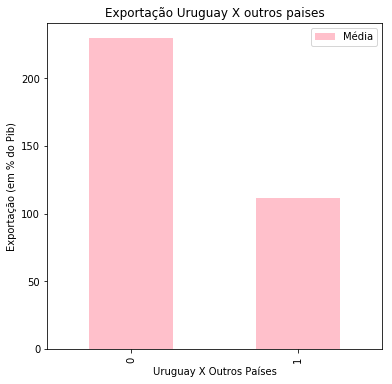

In [34]:
plot = tabela_media_uruguayXoutro_paises.plot(kind='bar',title='Exportação Uruguay X outros paises',figsize=(6, 6),color=('pink','pink'))
plt.ylabel('Exportação (em % do Pib)')
plt.xlabel('Uruguay X Outros Países')
plt.show()

Text(0, 0.5, 'Exportação')

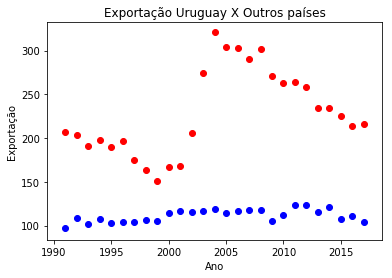

In [35]:
plt.scatter(uruguay_depois.index,uruguay_depois, color="r")
plt.scatter(uruguay_depois.index ,média_outros_paises, color="b")
plt.title('Exportação Uruguay X Outros países')
plt.xlabel('Ano')
plt.ylabel('Exportação')

In [36]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Retas Uruguay antes e depois da entrada no Mercosul')
    plt.xlabel('Anos')
    plt.ylabel('exportação(% do Pib)')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()


In [37]:
mop= média_outros_paises.reset_index()
mop

,index,mean
0,1991,97.711457
1,1992,108.707464
2,1993,102.276335
3,1994,108.056428
4,1995,103.163204
5,1996,104.502739
6,1997,104.200485
7,1998,106.701758
8,1999,104.942667
9,2000,114.237229


Ajuste linear entre:
Coeficiente linear: -5671.259259259258
Coeficiente angular: 2.944444444444444
Ajuste linear entre:
Coeficiente linear: -808.8823949942777
Coeficiente angular: 0.4593149150010396


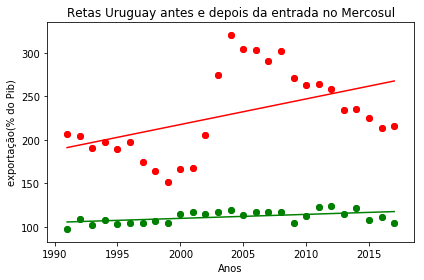

In [97]:
plt.scatter(udi["index"], udi.Uruguay, color="r")
reta(udi["index"], udi.Uruguay, "r")
plt.scatter(mop["index"] ,mop["mean"], color="g")
reta(mop["index"] ,mop["mean"], "g")


Relacionando os 3


In [39]:
data = {
'País/Organização': ['Uruguay', 'Mercosul','Outros países'],
'Média': [média_uruguay_depois,média_total_países_mercosul, média_total_outros_paises ],
}
tabela_media_uruguayXmercosulXoutros_paises = pd.DataFrame(data, columns=['País/Organização', 'Média'])

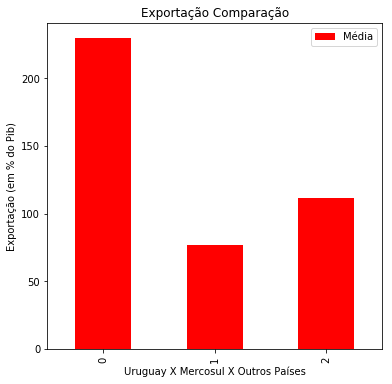

In [40]:
plot = tabela_media_uruguayXmercosulXoutros_paises.plot(kind='bar',title='Exportação Comparação',figsize=(6, 6),color=('red','red'))
plt.ylabel('Exportação (em % do Pib)')
plt.xlabel('Uruguay X Mercosul X Outros Países')
plt.show()

Text(0, 0.5, 'Exportação')

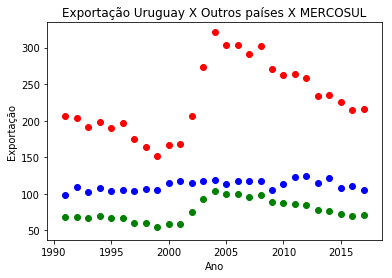

In [41]:
plt.scatter(uruguay_depois.index,uruguay_depois, color="r")
plt.scatter(uruguay_depois.index ,média_outros_paises, color="b")
plt.scatter(uruguay_depois.index ,média_paises_mercosul, color="g")
plt.title('Exportação Uruguay X Outros países X MERCOSUL')
plt.xlabel('Ano')
plt.ylabel('Exportação')

In [42]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Retas Uruguay antes e depois da entrada no Mercosul')
    plt.xlabel('Anos')
    plt.ylabel('exportação(% do Pib)')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()


Ajuste linear entre:
Coeficiente linear: -5671.259259259258
Coeficiente angular: 2.944444444444444
Ajuste linear entre:
Coeficiente linear: -1469.4419851444848
Coeficiente angular: 0.7716407203907202
Ajuste linear entre:
Coeficiente linear: -808.8823949942777
Coeficiente angular: 0.4593149150010396


Text(20.800000000000004, 0.5, 'Exportação')

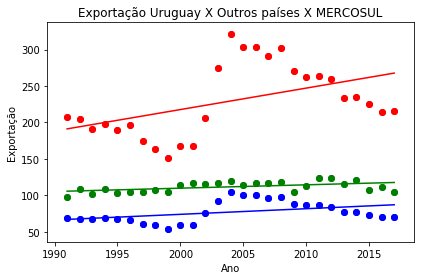

In [98]:
plt.scatter(udi["index"], udi.Uruguay, color="r")
reta(udi["index"], udi.Uruguay, "r")

plt.scatter(eom["index"] ,eom ["mean"] , color="b")
reta(eom["index"] ,eom ["mean"],"b")

plt.scatter(mop["index"] ,mop["mean"], color="g")
reta(mop["index"] ,mop["mean"], "g")

plt.title('Exportação Uruguay X Outros países X MERCOSUL')
plt.xlabel('Ano')
plt.ylabel('Exportação')


tabela dos países semelhantes aos países do mercosul
usar o PIB para encontrar países semelhantes 

In [77]:
#calculando a média do PIB de cada país para comparar com o pib médio do uruguay

pib_trasposta=pib_indice.transpose()
paises_menos_uruguay=pib_trasposta.drop(columns="Uruguay")
medias_pib_paises =paises_menos_uruguay.describe()
MED=medias_pib_paises.transpose()
MED

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Afghanistan,34.0,13.257353,9.252768,4.13,6.9250,10.450,14.525,43.6
Albania,38.0,19.951842,6.587504,7.22,15.4250,18.900,25.275,31.5
Algeria,58.0,29.581034,8.807303,12.90,23.2500,28.050,35.475,48.8
Angola,27.0,55.174074,18.773090,28.60,39.7000,54.900,69.350,89.7
Antigua and Barbuda,40.0,58.175000,11.469665,40.70,46.8500,56.650,66.375,82.1
Argentina,58.0,11.112931,5.940622,4.69,6.9125,9.165,12.375,28.4
Armenia,28.0,27.907143,8.057797,15.00,22.6000,28.000,32.425,47.2
Australia,58.0,16.505172,3.170225,12.00,13.6000,15.750,19.375,23.0
Austria,58.0,36.153448,10.347882,23.00,28.0250,33.050,45.050,54.0


In [81]:
pib_uruguay = pib_trasposta.loc[:,'Uruguay']
PUI=pib_uruguay.reset_index()
analise_PIB_uruguay=PUI.Uruguay.describe()
APUI=analise_PIB_uruguay.reset_index()
APUI

,index,Uruguay
0,count,58.000000
1,mean,199.672414
2,std,56.581997
3,min,103.000000
4,25%,152.000000
5,50%,196.500000
6,75%,235.000000
7,max,321.000000


In [111]:
Média= APUI.loc[1,'Uruguay']
Média
mais_menos= 190.672414<Média<200.672414
média_paises=MED.loc[:,"mean"]
MP=média_paises.transpose()
mpi=MP.reset_index()
mpi

,country,mean
0,Afghanistan,13.257353
1,Albania,19.951842
2,Algeria,29.581034
3,Angola,55.174074
4,Antigua and Barbuda,58.175000
5,Argentina,11.112931
6,Armenia,27.907143
7,Australia,16.505172
8,Austria,36.153448
9,Azerbaijan,46.842857


## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados